# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset


In [2]:
df=pd.read_csv("collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# Check for null Values

In [3]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

# Info about data

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


# More info about Dataset

In [5]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


# Chcking Dependency

In [6]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


The  Candidate is placed or not is highly dependent on the CGPA of the candidate , and also depends upon the number of internship done by the candidate.

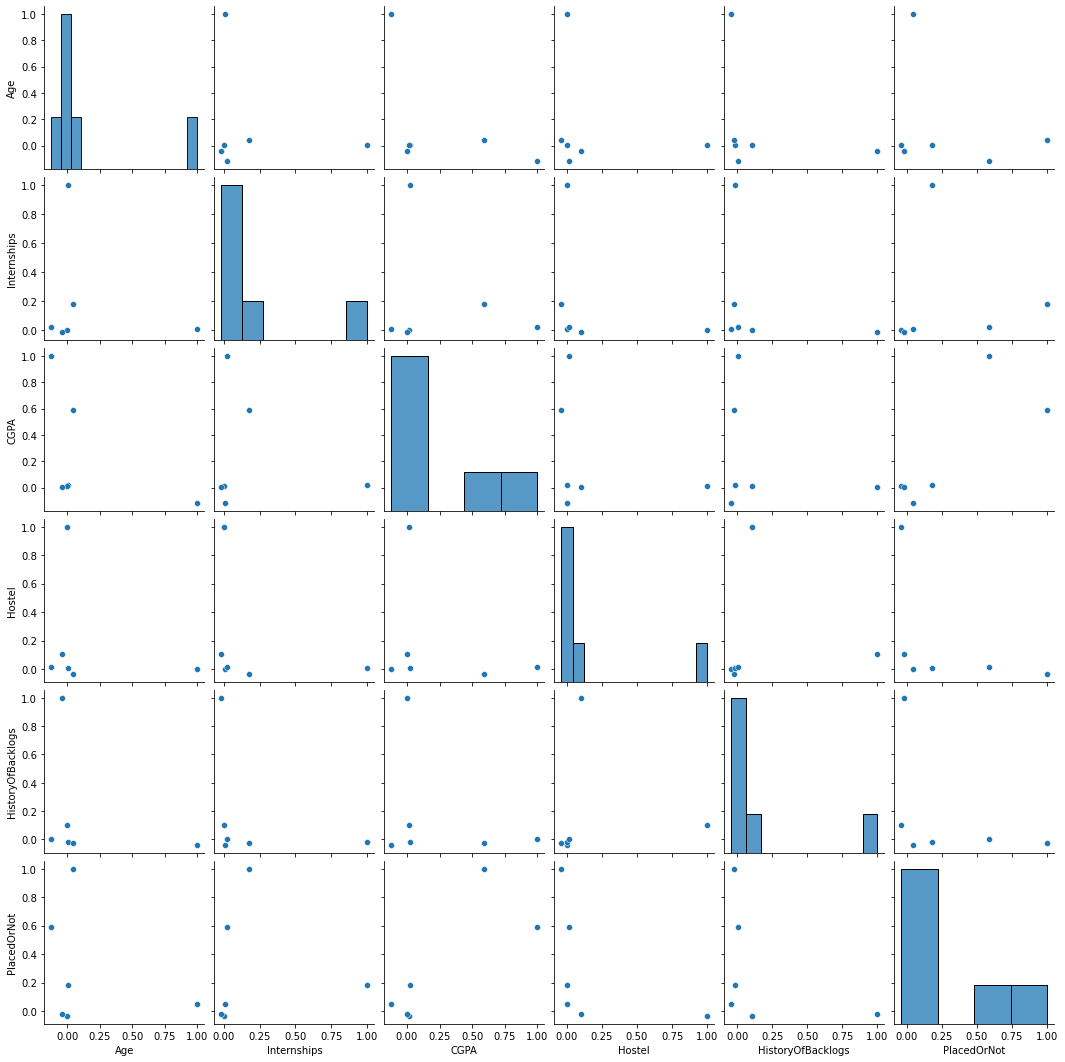

In [7]:
sns.pairplot(df.corr())

As Candidate is Placed or not is not dependent on History Of Backlogs and whether is lives in hostel or not.Modifying the dataset

In [8]:
df=df.drop(["HistoryOfBacklogs","Hostel"],axis="columns")

In [9]:
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0
2962,23,Male,Mechanical,1,7,0
2963,22,Male,Information Technology,1,7,0
2964,22,Male,Computer Science,1,7,0


# Performing EDA

In [10]:
m=df["Gender"]=="Female"
k=df['PlacedOrNot']==1
df1=df[m & k]
df1

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
11,22,Female,Electrical,1,8,1
14,21,Female,Electronics And Communication,2,8,1
44,22,Female,Information Technology,2,8,1
...,...,...,...,...,...,...
2877,23,Female,Computer Science,1,8,1
2918,21,Female,Computer Science,1,8,1
2927,22,Female,Computer Science,1,8,1
2950,23,Female,Computer Science,1,8,1


These are list of female candidate which are Placed

In [11]:
# calculating the mean cgpa of female candidate
print("The avergae cgpa of female candidate to get placed is : "+str(df1["CGPA"].mean()))


The avergae cgpa of female candidate to get placed is : 7.614545454545454


In [12]:
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0
2962,23,Male,Mechanical,1,7,0
2963,22,Male,Information Technology,1,7,0
2964,22,Male,Computer Science,1,7,0


In [13]:
a=df["PlacedOrNot"]==1
b=df["Gender"]=="Male"
df2=df[a & b]
df2

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
8,21,Male,Computer Science,2,6,1
13,21,Male,Computer Science,1,8,1
...,...,...,...,...,...,...
2949,22,Male,Civil,0,8,1
2951,21,Male,Computer Science,3,8,1
2952,23,Male,Mechanical,0,8,1
2956,22,Male,Computer Science,0,8,1


In [14]:
# Calculatin the mean cgpa of male candidate to get placed is 
print("The average cgpa of male candidate is: " + str(df2["CGPA"].mean()))

The average cgpa of male candidate is: 7.580645161290323


In [15]:
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0
2962,23,Male,Mechanical,1,7,0
2963,22,Male,Information Technology,1,7,0
2964,22,Male,Computer Science,1,7,0


In [16]:
data=df[df["PlacedOrNot"]==1]

In [17]:
data

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2951,21,Male,Computer Science,3,8,1
2952,23,Male,Mechanical,0,8,1
2954,23,Female,Computer Science,1,8,1
2956,22,Male,Computer Science,0,8,1


In [18]:
data["Stream"].value_counts()

Computer Science                 452
Information Technology           409
Electronics And Communication    251
Mechanical                       200
Electrical                       181
Civil                            146
Name: Stream, dtype: int64

This means that , Most of candidates are placed from Computer Science Stream and least candidates are placed from Civil Stream

In [19]:
data2=df[df["Internships"]==1]
data2["Gender"].value_counts()

Male      971
Female    263
Name: Gender, dtype: int64

This means most of male candiate are placed , then the female candidate.

In [20]:
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0
2962,23,Male,Mechanical,1,7,0
2963,22,Male,Information Technology,1,7,0
2964,22,Male,Computer Science,1,7,0


In [21]:
data3=df[df["Internships"]>=1]
data3["PlacedOrNot"].value_counts()

1    985
0    650
Name: PlacedOrNot, dtype: int64

This means , thier are 650 students who have done atleast 1 intenship but are not placed . 

In [22]:
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0
2962,23,Male,Mechanical,1,7,0
2963,22,Male,Information Technology,1,7,0
2964,22,Male,Computer Science,1,7,0


# Visualizing data

In [23]:
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1
...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0
2962,23,Male,Mechanical,1,7,0
2963,22,Male,Information Technology,1,7,0
2964,22,Male,Computer Science,1,7,0


Text(0, 0.5, 'Count')

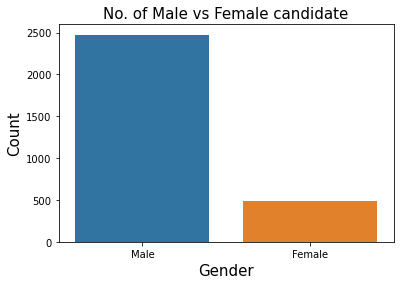

In [24]:
# Number of male and female candidates 
sns.countplot(x="Gender",data=df)
plt.title("No. of Male vs Female candidate",fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)

Text(0, 0.5, 'Count')

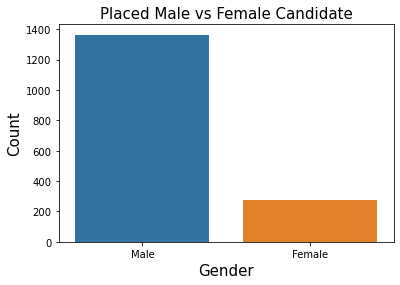

In [25]:
# The are Number of Male vs Female Candidate get Placed
sns.countplot(x="Gender",data=data)
plt.title("Placed Male vs Female Candidate",fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)

In [26]:
df.head()

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1


Text(16.424999999999997, 0.5, 'CGPA')

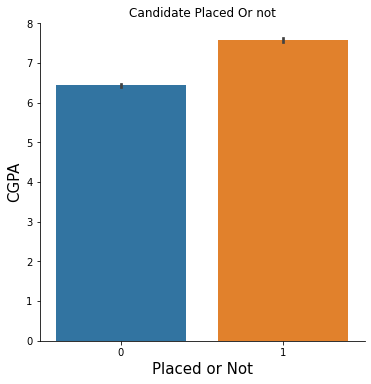

In [27]:
# Plot between CGPA of Candidate vs Placed or NOt
sns.catplot(x="PlacedOrNot",y="CGPA",data=df,kind="bar")
plt.title("Candidate Placed Or not")
plt.xlabel("Placed or Not",fontsize=15)
plt.ylabel("CGPA",fontsize=15)


0 Means candidate is not selected , 1 Means Candidate is Seleted.

In [28]:
df.head()

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1
1,21,Female,Computer Science,0,7,1
2,22,Female,Information Technology,1,6,1
3,21,Male,Information Technology,0,8,1
4,22,Male,Mechanical,0,8,1


# Performing Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [44]:
df["Gender"]=l.fit_transform(df["Gender"])


In [45]:
df["Stream"]=l.fit_transform(df["Stream"])
df

,Age,Gender,Stream,Internships,CGPA,PlacedOrNot
0,22,1,3,1,8,1
1,21,0,1,0,7,1
2,22,0,4,1,6,1
3,21,1,4,0,8,1
4,22,1,5,0,8,1
...,...,...,...,...,...,...
2961,23,1,4,0,7,0
2962,23,1,5,1,7,0
2963,22,1,4,1,7,0
2964,22,1,1,1,7,0


# Creating the model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Setting the input and target Variables

In [47]:
x=df.drop("PlacedOrNot",axis="columns")


In [48]:
y=df["PlacedOrNot"]

# Splitting the dataset to avoid overfitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Random forest Classifier is one of the best classification algorithm for such dataset

In [63]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
s=model.score(x_test,y_test)
print("Random Forest Score is : "+ str(s*100))

Random Forest Score is : 85.17520215633422


In [64]:
predict=model.predict(x_test)
predict

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,

# confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
cv=confusion_matrix(predict,y_test)
cv

array([[267,  69],
       [ 41, 365]])

<AxesSubplot:>

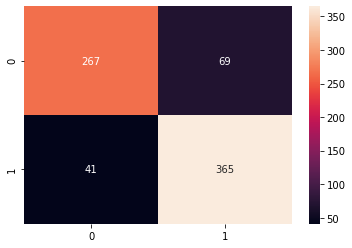

In [67]:
sns.heatmap(cv,annot=True,fmt='g')
plt.xlabel("Machine Predicted",fontsize=15)
plt.ylabel("Actual Values",fontsize=15)
plt.title("Confusion Matrix visualization")
plt.